# EDA

### This notebook contains some exploratory data analysis for the first subtask.

Firstly, we find where we stored merged data. This was done with a merge script in this folder.

In [3]:
from pathlib import Path
wd = Path.cwd()
wd = wd.parent
wd = wd / 'merged_data' 
sub1 = str(wd) + '/subtask1.parquet'
print(sub1)

/home/matijak/Documents/programiranje/projects/semeval/merged_data/subtask1.parquet


Let's see some data rows

In [4]:
import pandas as pd
df = pd.read_parquet(sub1)
#df.head(n=20)
df.aggregate

<bound method DataFrame.aggregate of      lang    art_name             entity start   end       class1  \
0      BG  BG_670.txt              Запад   152   156   Antagonist   
1      BG  BG_670.txt                САЩ   530   532   Antagonist   
2      BG  BG_670.txt               НАТО   535   538   Antagonist   
3      BG  BG_670.txt            Украйна   578   584   Antagonist   
4      BG  BG_670.txt  украински войници   633   649     Innocent   
...   ...         ...                ...   ...   ...          ...   
2530   PT  PT_159.txt              China   371   375     Innocent   
2531   PT   PT_74.txt           Pokrovsk  1139  1146     Innocent   
2532   PT   PT_31.txt            Ucrânia   313   319   Antagonist   
2533   PT   PT_31.txt                EUA   327   329   Antagonist   
2534   PT   PT_31.txt            Moscovo  1999  2005  Protagonist   

                                          classes2  \
0     [Conspirator, Instigator, Foreign Adversary]   
1                         

## Our tasks

### Multiclass labeling 

Firstly we need to label each named entity with a label protagonist, antagonist or innocent.
Let's look at the distribution of each label in the whole dataset.

class1
Antagonist     1234
Protagonist     737
Innocent        564
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Graph of Label Counts')

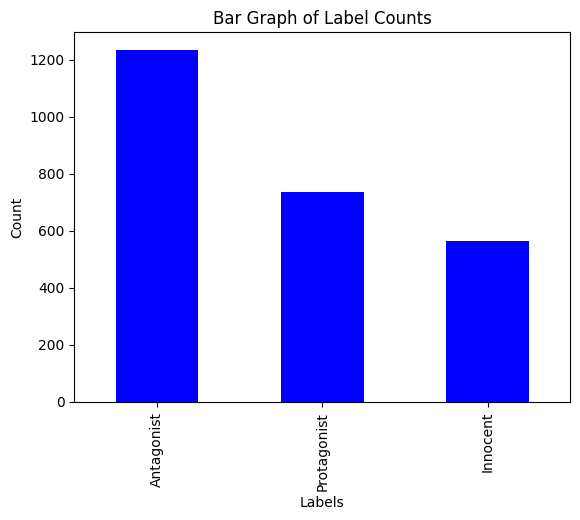

In [8]:
import matplotlib.pyplot as plt
label_counts = df['class1'].value_counts()
print(label_counts)
label_counts.plot(kind='bar', color='blue')
plt.xlabel('Labels',)
plt.ylabel('Count')
plt.title('Bar Graph of Label Counts')

#### The dataset contains 4(5 later) languages. Let's se the distribution of labels in each category.
#### Also we will view how much data we have representing every language.
Firstly data entries per languge.

lang
BG    448
Name: count, dtype: int64 lang
EN    414
Name: count, dtype: int64 lang
HI    928
Name: count, dtype: int64 lang
PT    745
Name: count, dtype: int64


<BarContainer object of 4 artists>

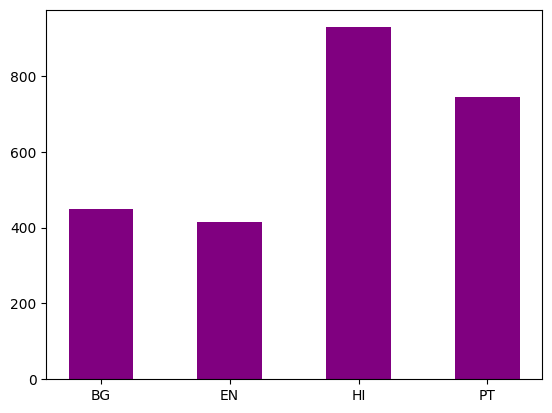

In [22]:
df_bg = df[ df['lang'] == 'BG']
df_en = df[ df['lang'] == 'EN']
df_hi = df[ df['lang'] == 'HI']
df_pt = df[ df['lang'] == 'PT']
x = ["BG", "EN", "HI", "PT"]
y = [len(df_bg), len(df_en), len(df_hi), len(df_pt)]
print(df_bg['lang'].value_counts(),
df_en['lang'].value_counts(),
df_hi['lang'].value_counts(),
df_pt['lang'].value_counts())
plt.bar(x, y, width=0.5, color='purple')

## Bulgarian

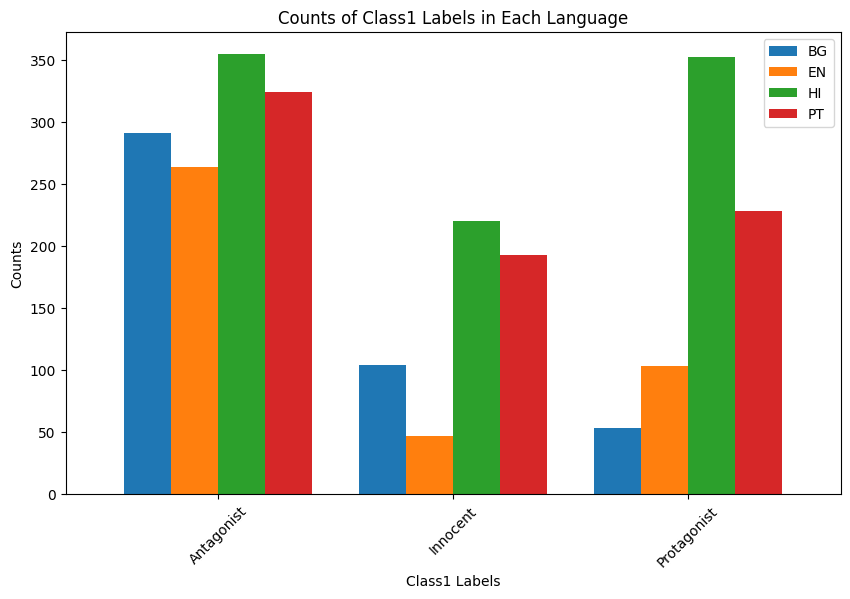

In [23]:
count_bg = df_bg['class1'].value_counts()
count_en = df_en['class1'].value_counts()
count_hi = df_hi['class1'].value_counts()
count_pt = df_pt['class1'].value_counts()

counts_df = pd.DataFrame({
    'BG': count_bg,
    'EN': count_en,
    'HI': count_hi,
    'PT': count_pt
}).fillna(0)  
ax = counts_df.plot(kind='bar', width=0.8, figsize=(10, 6))

plt.xlabel('Class1 Labels')
plt.ylabel('Counts')
plt.title('Counts of Class1 Labels in Each Language')
plt.xticks(rotation=45)  

plt.show()